In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
import os
import re
from jqi_functions import *
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
data = pd.read_csv('high_wage_outputs_v2_COL.csv')

In [3]:
county_info = pd.read_csv('data/county_to_regions_key - Sheet1.csv')

In [4]:
cost_of_living = pd.read_csv('data/united-way-col-1A1PS1C2019.csv') # 1 adult, 1 preschooler, 1 child

In [5]:
data = pd.merge(data, county_info, on='County')

In [6]:
data = data[['Industry', 'Date', 'County', 'CDI Regions', 'Rural/Urban', 'Population', 'High Wage Count', 'Cost of Living']]

In [7]:
data['Population'] = normalize_titles(data['Population']).astype(int)

In [8]:
data.head()

,Industry,Date,County,CDI Regions,Rural/Urban,Population,High Wage Count,Cost of Living
0,accounting tax preparation bookkeeping and pay...,2019-01-01,Los Angeles,Los Angeles,Urban,10081570,8490,80216
1,accounting tax preparation bookkeeping and pay...,2019-01-01,Los Angeles,Los Angeles,Urban,10081570,8490,80216
2,accounting tax preparation bookkeeping and pay...,2019-02-01,Los Angeles,Los Angeles,Urban,10081570,9359,80216
3,accounting tax preparation bookkeeping and pay...,2019-02-01,Los Angeles,Los Angeles,Urban,10081570,9359,80216
4,accounting tax preparation bookkeeping and pay...,2019-03-01,Los Angeles,Los Angeles,Urban,10081570,9517,80216


### 

### Histogram of wages by industry

In [16]:
ca_ipums = cleaned_ipums('2019')

In [24]:
ca_ipums_wages = ca_ipums.groupby(by=['Industry Title_x']).mean()

In [32]:
ca_ipums_wages_regions = pd.merge(ca_ipums, county_info, on='COUNTYFIP').groupby(by=['CDI Regions']).mean()

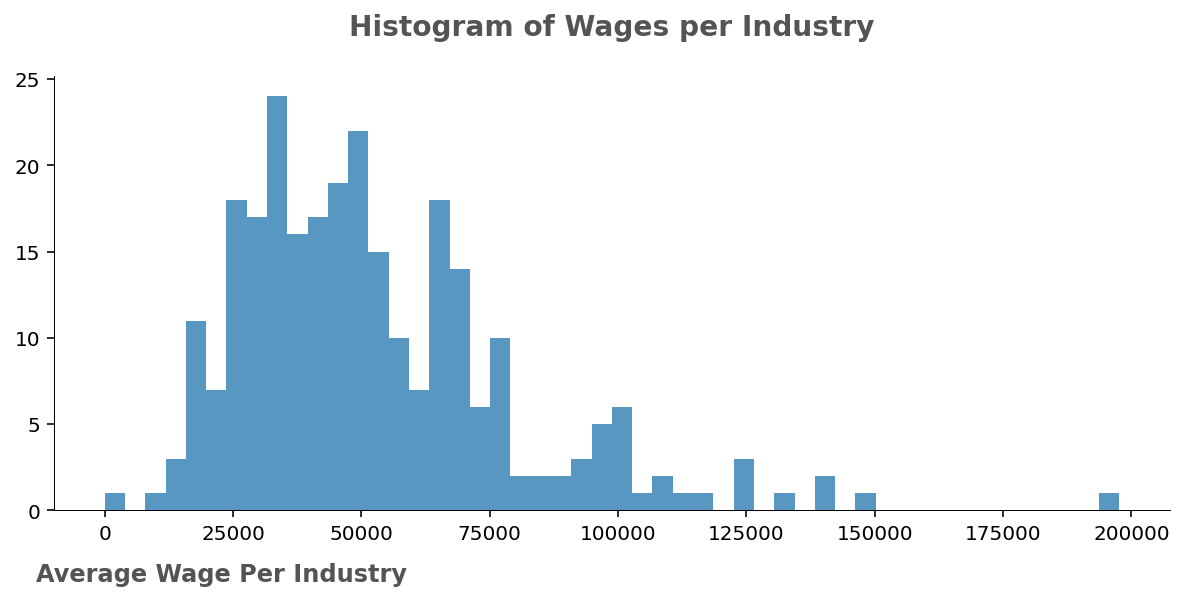

In [25]:
fig, ax = plt.subplots(figsize=(10,4)) 
ax.hist(ca_ipums_wages['INCWAGE'], bins=50, color='#5797c2')
ax.set_title('Histogram of Wages per Industry', fontsize=14, weight='bold', pad=20, color='#545454')
ax.set_xlabel('Average Wage Per Industry', fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.15, -0.12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
plt.show()

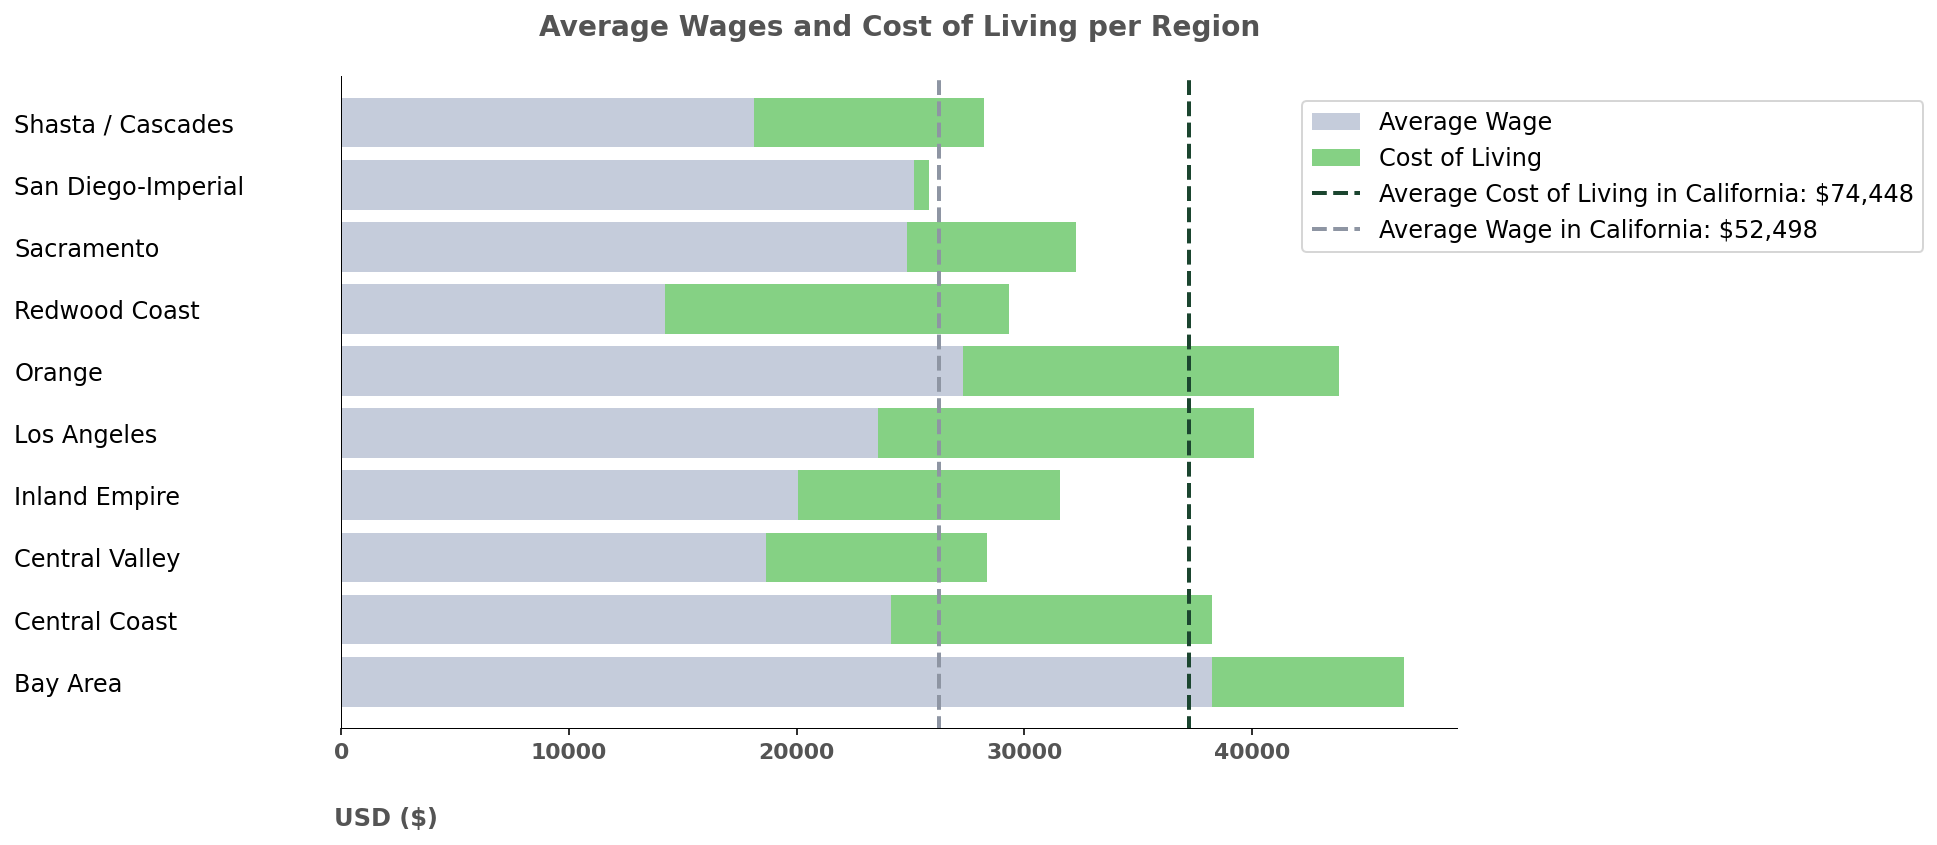

In [62]:
fig, ax = plt.subplots(figsize=(10,6))

bar1 = ax.barh(np.arange(10), cost_of_living['Cost of Living'][0:10].values, color='#85d184', label="Cost of Living")
bar2 = ax.barh(np.arange(10), ca_ipums_wages_regions['INCWAGE'].values, color='#c5ccdb', label="Average Wage")

ax.set_yticks(np.arange(10))
ax.set_yticklabels(ca_ipums_wages_regions.index, fontsize = 12, ha='left')
ax.tick_params(axis='y',direction='out', pad=160, left=False)

ax.set_xlabel("USD ($)", fontsize=12, weight='bold', color = '#545454')
ax.set_xticklabels(['0', '10000','20000','30000','40000','50000', '60000', '70000', '80000', '90000'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.04, -0.12)

avg_wage = int(ca_ipums['INCWAGE'].mean())
ca_col = cost_of_living['Cost of Living'][11:12].values

ax.vlines(x=avg_wage, ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average Wage in California: $52,498')
ax.vlines(x=ca_col, ymin=-0.8, ymax=10, 
          color='#1b452f', lw=2, ls='dashed', label='Average Cost of Living in California: $74,448')
ax.set_ylim(-0.75, 9.75)

ax.set_title('Average Wages and Cost of Living per Region', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.85, 0.98), loc='upper left', fontsize=12)
plt.show()

### High wage count in CA over 2019

In [9]:
hw_state = data.groupby(by=["Date"]).sum()
hw_state

,Population,High Wage Count,Cost of Living
Date,,,
2019-01-01,3587675685,1953057,48984599
2019-02-01,3587675685,1965485,48984599
2019-03-01,3587675685,1964601,48984599
2019-04-01,3587675685,1972604,48984599
2019-05-01,3587675685,1976131,48984599
2019-06-01,3587675685,1980330,48984599
2019-07-01,3587675685,1973622,48984599
2019-08-01,3587675685,1977896,48984599
2019-09-01,3587675685,1981177,48984599


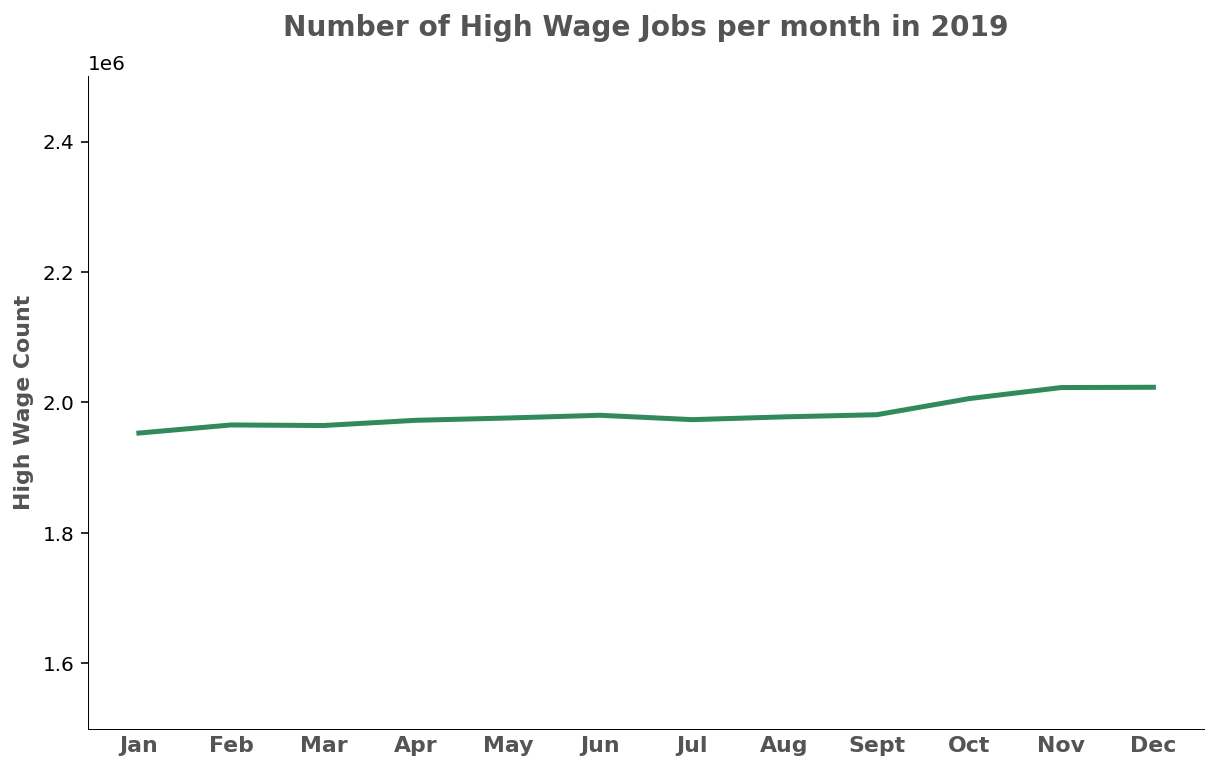

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['High Wage Count'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('Number of High Wage Jobs per month in 2019', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(1.5e+6,2.5e+6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

### Industries with most and least high wage jobs in the state

In [11]:
hw_state_industry = data.groupby(by=["Industry"]).mean().sort_values(by='High Wage Count')
hw_state_industry_cut = hw_state_industry.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]
hw_state_industry_cut

,Population,High Wage Count,Cost of Living
Industry,,,
book stores and news dealers,10081570.0,0.000000,80216.0
nonferrous metal except aluminum production and processing,10081570.0,0.000000,80216.0
clothing stores,3316073.0,76.083333,79472.0
taxi and limousine service,10081570.0,216.750000,80216.0
retail bakeries,10081570.0,240.250000,80216.0
management scientific and technical consulting services,6624807.0,11617.541667,83932.0
architectural engineering and related services,5963060.2,12256.400000,83040.0
computer systems design and related services,6624807.0,13254.666667,83932.0
aerospace products and parts manufacturing,6698821.5,14731.375000,79844.0


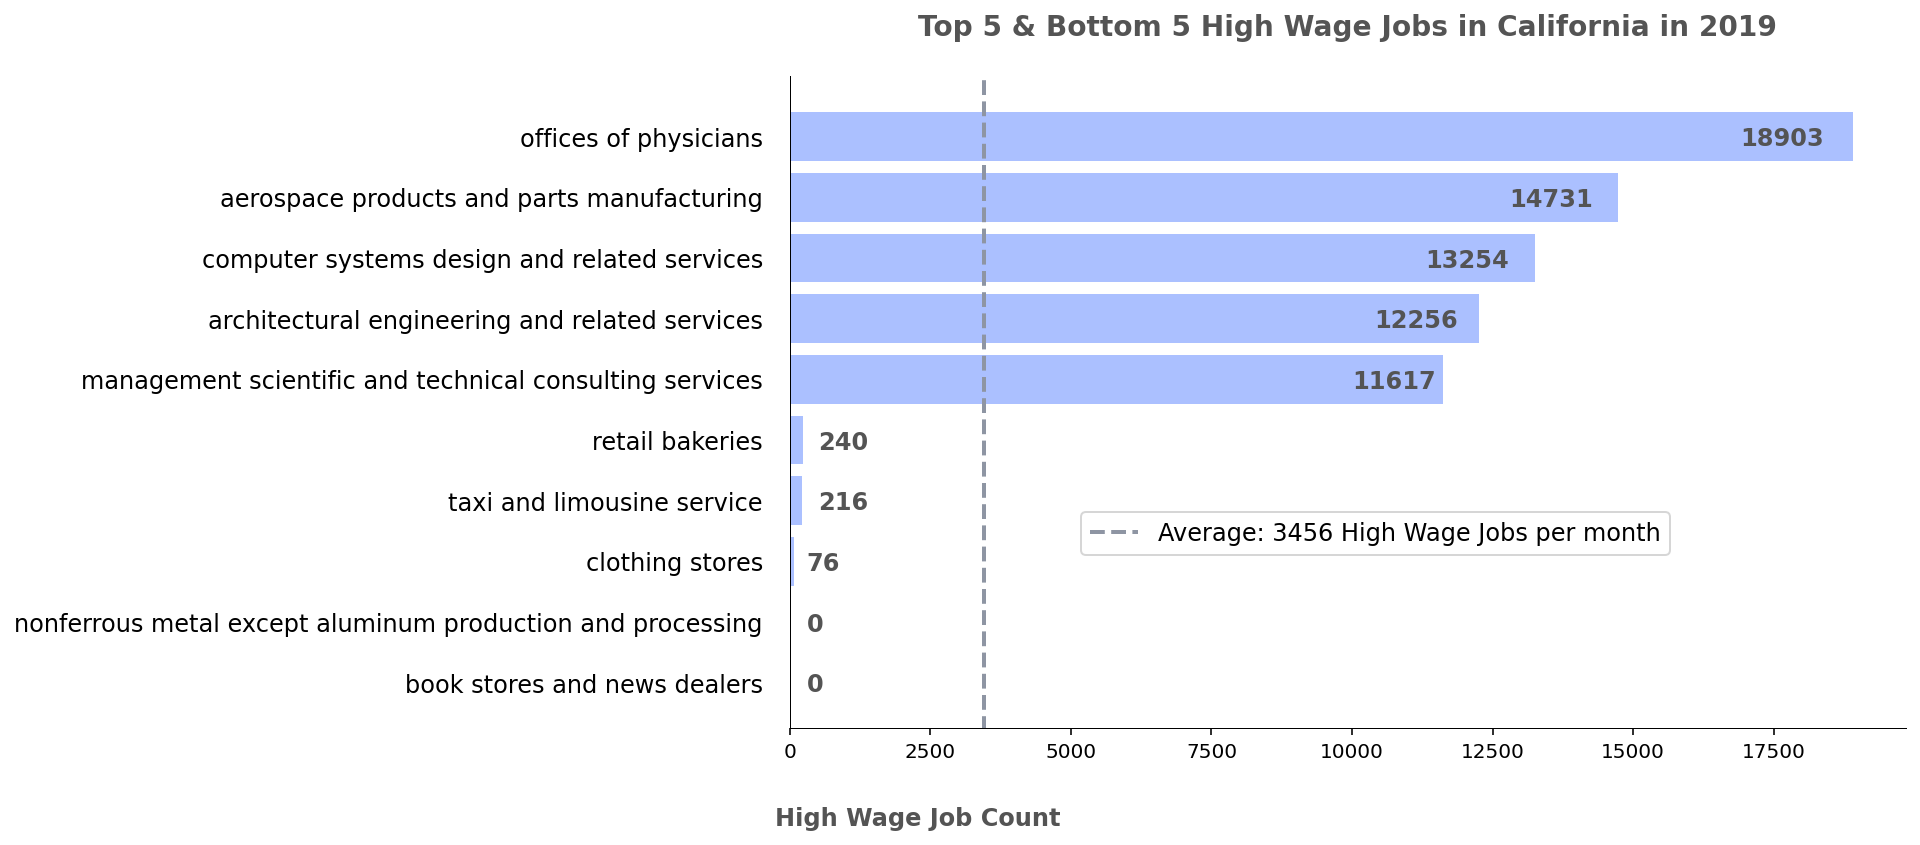

In [63]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_state_industry_cut['High Wage Count'].values, color='#abc0ff')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_state_industry_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = int(hw_state_industry['High Wage Count'].values.mean())

ax.vlines(x=mean_val, ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val} High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Top 5 & Bottom 5 High Wage Jobs in California in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate("0", (300, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("0", (300, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("76", (300, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("216", (500, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("240", (500, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("11617", (10000, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("12256", (10400, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("13254", (11300, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("14731", (12800, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("18903", (16900, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.25, 0.35), loc='upper left', fontsize=12)
plt.show()

### Average high wage count in 2019 per region

In [64]:
hw_regions = data.groupby(by=["CDI Regions"]).mean().sort_values(by='High Wage Count')
hw_regions

,Population,High Wage Count,Cost of Living
CDI Regions,,,
Redwood Coast,1.359400e+05,83.666667,59608.000000
Shasta / Cascades,2.025145e+05,380.750000,58743.000000
Central Valley,7.066724e+05,740.539394,56191.163636
Central Coast,5.131003e+05,755.614286,78528.400000
Inland Empire,2.280235e+06,1233.500000,63159.500000
Sacramento,8.572672e+05,2316.525641,64557.846154
Bay Area,7.221713e+05,2527.359756,84255.024390
San Diego-Imperial,3.261066e+06,3135.225146,78957.333333
Los Angeles,1.008157e+07,3830.348958,80216.000000


In [65]:
cost_of_living[0:11]

,Regions,Cost of Living
0,Bay Area,93392
1,Central Coast,76493
2,Central Valley,56747
3,Inland Empire,63170
4,Los Angeles,80216
5,Orange,87648
6,Redwood Coast,58625
7,Sacramento,64520
8,San Diego-Imperial,51652
9,Shasta / Cascades,56468


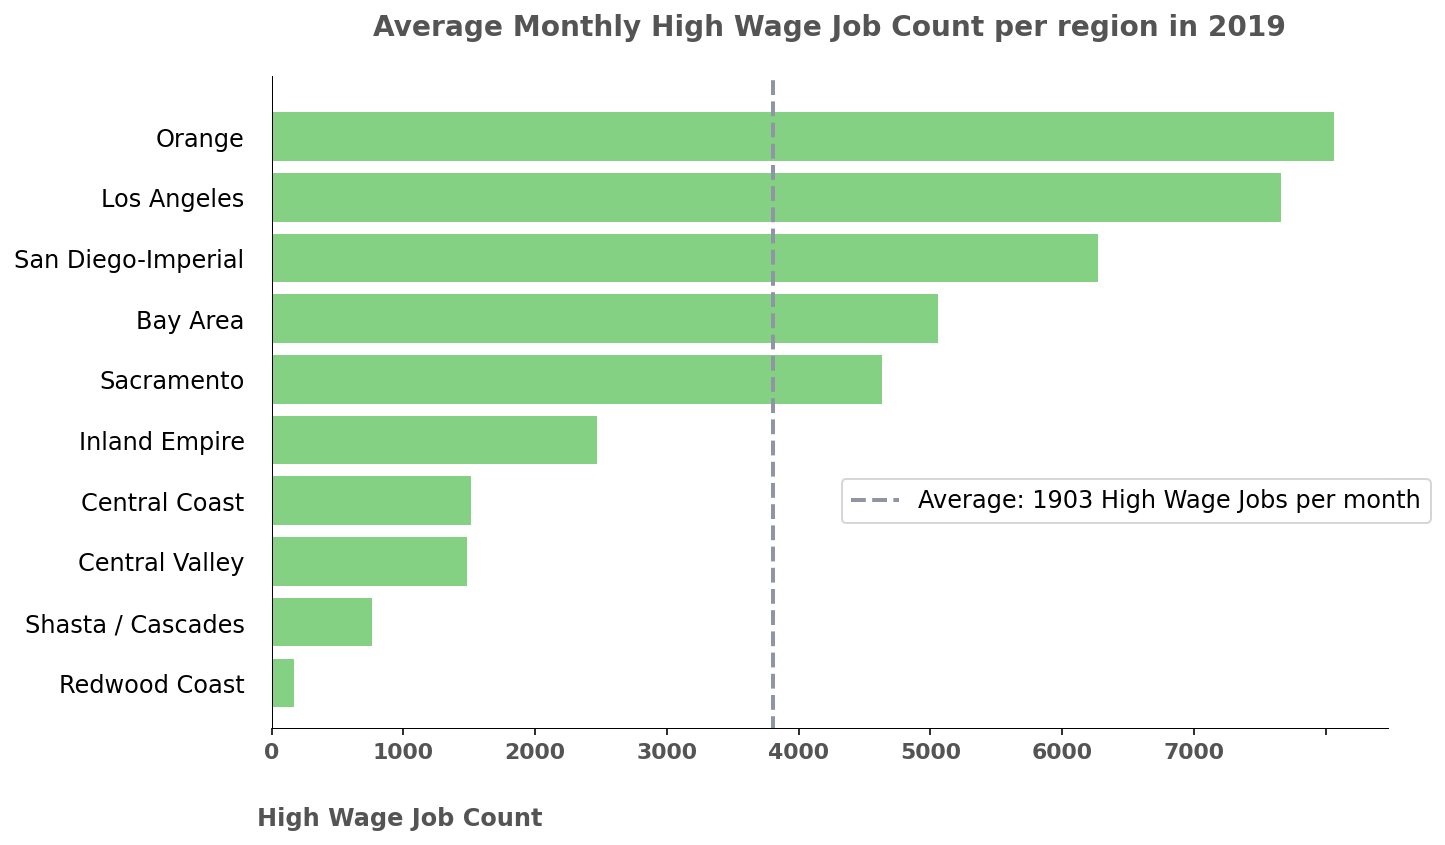

In [66]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_regions['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_regions.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.set_xticklabels(['0', '1000','2000','3000','4000','5000','6000','7000'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = int(hw_regions['High Wage Count'].values.mean())

ax.vlines(x=mean_val, ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val} High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Average Monthly High Wage Job Count per region in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.5, 0.4), loc='upper left', fontsize=12)
plt.show()

In [67]:
shasta_data = data.loc[data['CDI Regions'] == 'Shasta / Cascades']
cv_data = data.loc[data['CDI Regions'] == 'Central Valley']
rc_data = data.loc[data['CDI Regions'] == 'Redwood Coast']
sd_data = data.loc[data['CDI Regions'] == 'San Diego-Imperial']
orange_data = data.loc[data['CDI Regions'] == 'Orange']
ie_data = data.loc[data['CDI Regions'] == 'Inland Empire']
cc_data = data.loc[data['CDI Regions'] == 'Central Coast']
bay_data = data.loc[data['CDI Regions'] == 'Bay Area']
sac_data = data.loc[data['CDI Regions'] == 'Sacramento']
la_data = data.loc[data['CDI Regions'] == 'Los Angeles']

In [68]:
hw_shasta = shasta_data.groupby(by=["Date"]).sum()
hw_cv = cv_data.groupby(by=["Date"]).sum()
hw_rc = rc_data.groupby(by=["Date"]).sum()
hw_sd = sd_data.groupby(by=["Date"]).sum()
hw_orange = orange_data.groupby(by=["Date"]).sum()
hw_ie = ie_data.groupby(by=["Date"]).sum()
hw_cc = cc_data.groupby(by=["Date"]).sum()
hw_bay = bay_data.groupby(by=["Date"]).sum()
hw_sac = sac_data.groupby(by=["Date"]).sum()
hw_la = la_data.groupby(by=["Date"]).sum()

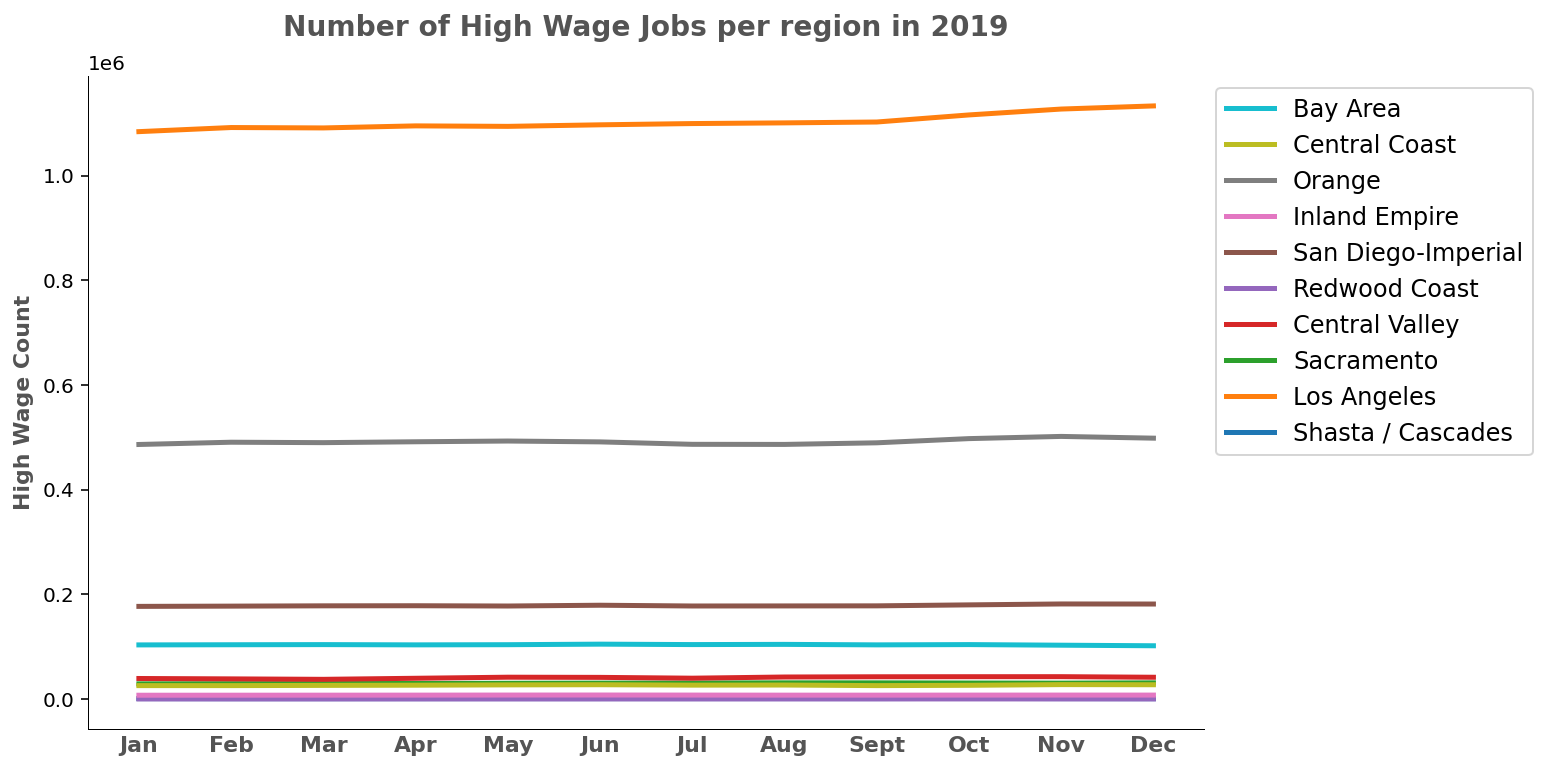

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_shasta['High Wage Count'].values, lw=2.5, label='Shasta / Cascades')
ax.plot(hw_la['High Wage Count'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['High Wage Count'].values, lw=2.5, label='Sacramento')
ax.plot(hw_cv['High Wage Count'].values, lw=2.5, label='Central Valley')
ax.plot(hw_rc['High Wage Count'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['High Wage Count'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['High Wage Count'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['High Wage Count'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['High Wage Count'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['High Wage Count'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('Number of High Wage Jobs per region in 2019', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

### Average high wage count between rural and urban locations

In [70]:
hw_rural_urban = data.groupby(by=["Rural/Urban"]).mean().sort_values(by='High Wage Count')
hw_rural_urban

,Population,High Wage Count,Cost of Living
Rural/Urban,,,
Rural,3.216112e+05,692.324275,65699.804348
Urban,6.224532e+06,3399.342334,80073.881533


In [72]:
# fig, ax = plt.subplots(figsize=(10,6))

# ax.barh(np.arange(2), hw_rural_urban['High Wage Count'].values, color='#c5ccdb')

# ax.set_yticks(np.arange(2))
# ax.set_yticklabels(hw_rural_urban.index, fontsize = 14, ha='left')
# ax.tick_params(axis='y',direction='out', pad=80, left=False)

# ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
# ax.set_xticklabels(['0', '1000','2000','3000','4000','5000','6000'], 
#                    fontsize=11, weight='bold', color = '#545454')
# ax.xaxis.set_label_coords(0.115, -0.12)

# ax.annotate("5941 Monthly High Wage Jobs", (6200, 1), size=12, color='#545454', annotation_clip=False)
# ax.annotate("4744 Monthly High Wage Jobs", (5050, 0), size=12, color='#545454', annotation_clip=False)

# ax.set_title('Average Monthly High Wage Job Count per region in 2019', 
#              fontsize=14, weight='bold', pad=20, color='#545454')

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_linewidth(0.5)
# ax.spines['left'].set_linewidth(0.5)

# plt.show()

### Top 5 & Bottom 5 Counties by number of high wage jobs

In [267]:
hw_county = data.groupby(by=["County"]).mean().sort_values(by='High Wage Count')
hw_county_cut = hw_county.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]

In [274]:
hw_county_cut

,Population,High Wage Count,hw_to_pop_perc
County,,,
Los Angeles,10081570.0,3496.092778,0.034678
San Francisco,874961.0,4051.017123,0.462994
Santa Clara,1927470.0,4137.352941,0.214652
Santa Barbara,444829.0,4148.739583,0.932659
San Diego,3316073.0,4150.802222,0.125172
Humboldt,135940.0,6088.520649,4.478829
Butte,225817.0,6436.230303,2.850197
Shasta,179212.0,6869.705128,3.833284
El Dorado,188563.0,7950.778261,4.216510


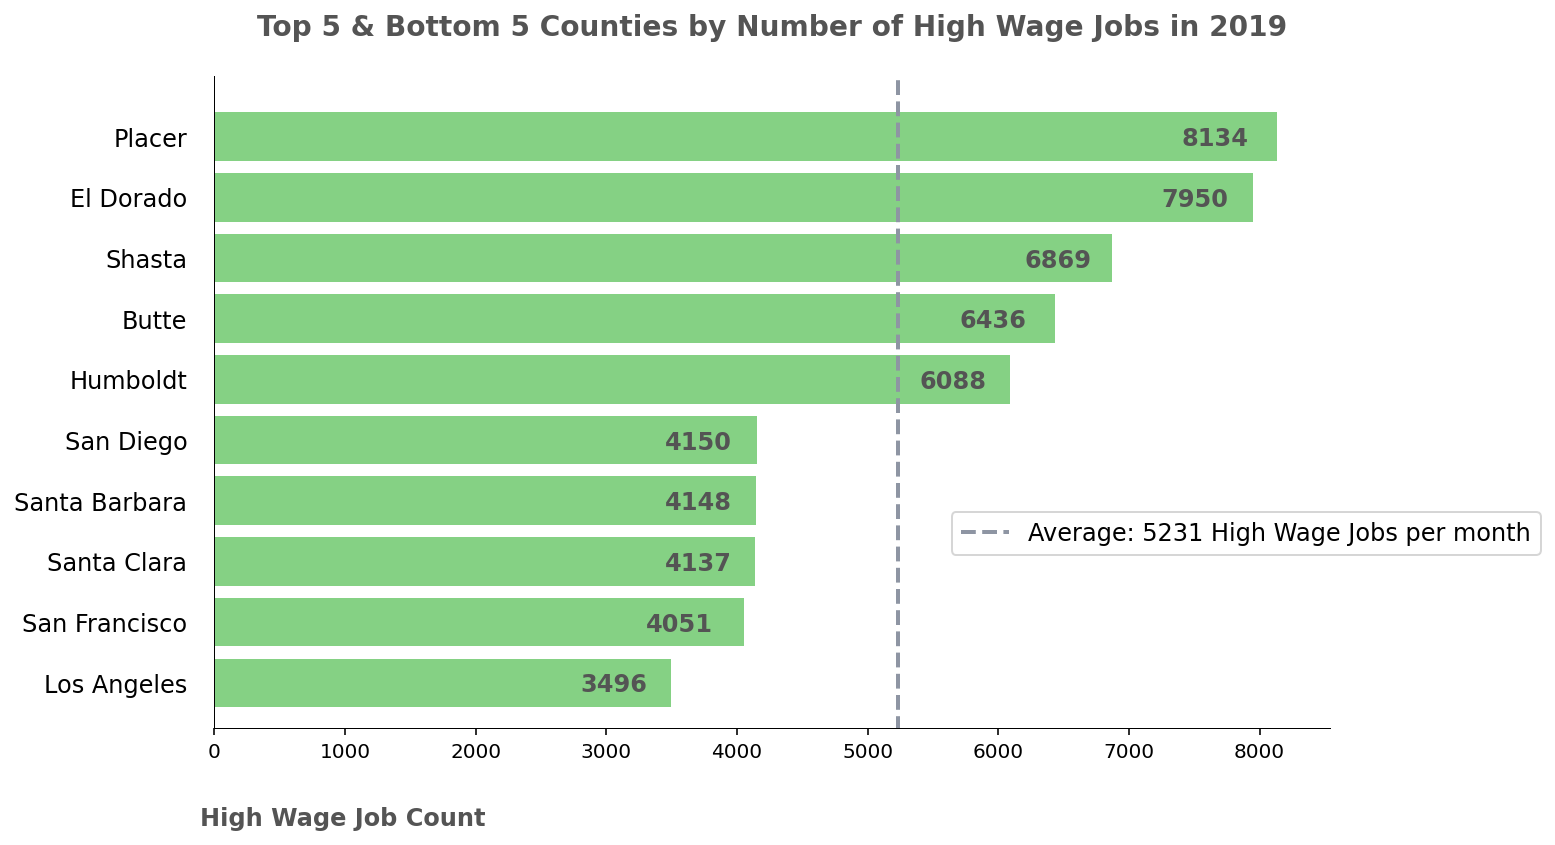

In [299]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_county_cut['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_county_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

ax.vlines(x=hw_county['High Wage Count'].values.mean(), ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label='Average: 5231 High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Top 5 & Bottom 5 Counties by Number of High Wage Jobs in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[0])}", (2800, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[1])}", (3300, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[2])}", (3450, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[3])}", (3450, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[4])}", (3450, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[5])}", (5400, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[6])}", (5700, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[7])}", (6200, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[8])}", (7250, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[9])}", (7400, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.65, 0.35), loc='upper left', fontsize=12)
plt.show()

In [300]:
hw_county = data.groupby(by=["County"]).mean().sort_values(by='hw_to_pop_perc')
hw_county_cut = hw_county.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]
hw_county_cut

,Population,High Wage Count,hw_to_pop_perc
County,,,
Los Angeles,10081570.0,3496.092778,0.034678
San Diego,3316073.0,4150.802222,0.125172
Orange,3168044.0,4630.766667,0.146171
Riverside,2411439.0,4968.080000,0.206021
San Bernardino,2149031.0,4447.026846,0.206932
Napa,139623.0,4983.345652,3.569144
Shasta,179212.0,6869.705128,3.833284
Kings,150691.0,5951.587963,3.949531
El Dorado,188563.0,7950.778261,4.216510


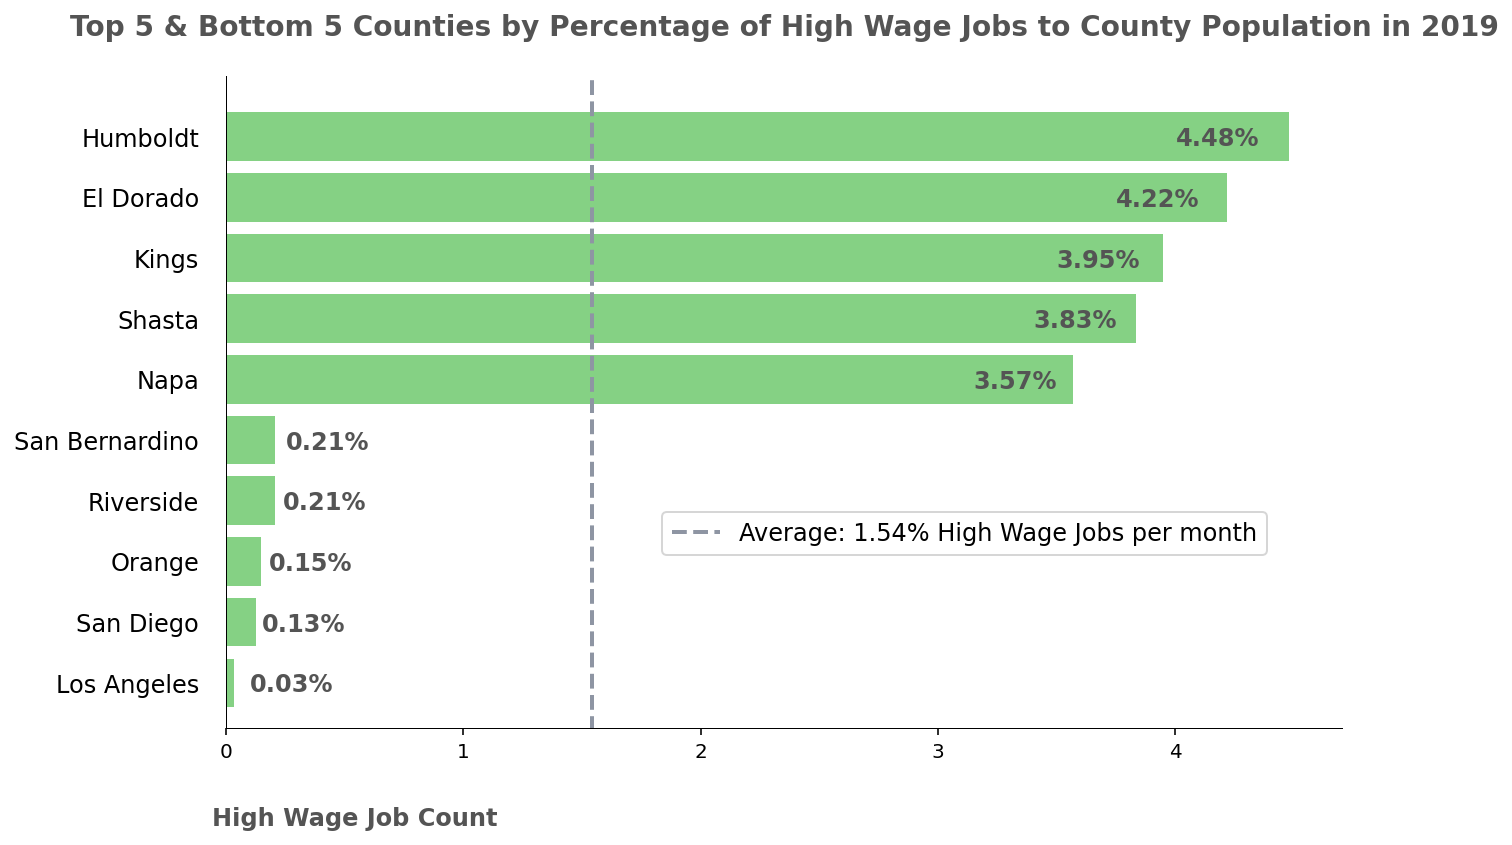

In [323]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_county_cut['hw_to_pop_perc'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_county_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

ax.vlines(x=hw_county['hw_to_pop_perc'].values.mean(), ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label='Average: 1.54% High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Top 5 & Bottom 5 Counties by Percentage of High Wage Jobs to County Population in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[0], 2)}%", (0.1, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[1], 2)}%", (0.15, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[2], 2)}%", (0.18, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[3], 2)}%", (0.24, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[4], 2)}%", (0.25, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[5], 2)}%", (3.15, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[6], 2)}%", (3.4, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[7], 2)}%", (3.5, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[8], 2)}%", (3.75, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut['hw_to_pop_perc'].values[9], 2)}%", (4, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.38, 0.35), loc='upper left', fontsize=12)
plt.show()

### Largest industry high wage count disparities between regions/counties

In [392]:
region_min = data.groupby(by=["CDI Regions", "Industry"]).min()['High Wage Count']

In [393]:
region_min

CDI Regions        Industry                                                   
Bay Area           accounting tax preparation bookkeeping and payroll services     4290
                   advertising public relations and related services               7435
                   aerospace products and parts manufacturing                     19981
                   agencies brokerages and other insurance related activities      6968
                   animal slaughtering and processing                               436
                                                                                  ...  
Shasta / Cascades  sporting goods and hobby and toy stores                          688
                   taxi and limousine service                                       381
                   travel arrangements and reservation services                    2214
                   warehousing and storage                                         1027
                   waste management and r

In [339]:
region_max = data.groupby(by=["CDI Regions", "Industry"]).max()['High Wage Count']

In [374]:
max_min = pd.merge(region_min, region_max, on=['CDI Regions', 'Industry'])
max_min = max_min.rename(columns = {'High Wage Count_x':'hw_min', 'High Wage Count_y':'hw_max'})
max_min['hw_diff'] = max_min['hw_max'] - max_min['hw_min']
max_min = max_min.reset_index()[['CDI Regions', 'Industry', 'hw_diff']]
max_min_cut = max_min.groupby('CDI Regions').max().sort_values('hw_diff')

In [388]:
max_min.loc[max_min['CDI Regions'] == 'Los Angeles'].sort_values('hw_diff')

,CDI Regions,Industry,hw_diff
390,Los Angeles,us marines,0
319,Los Angeles,animal slaughtering and processing,0
364,Los Angeles,nonferrous metal except aluminum production an...,0
325,Los Angeles,book stores and news dealers,0
339,Los Angeles,department stores,5
...,...,...,...
330,Los Angeles,colleges universities and professional schools...,2891
355,Los Angeles,lessors of real estate and offices of real est...,3140
332,Los Angeles,construction the cleaning of buildings and dwe...,3344
380,Los Angeles,restaurants and other food services,4151


In [ ]:
# this doesn't make any sense - a region with only one county like LA should not have any difference

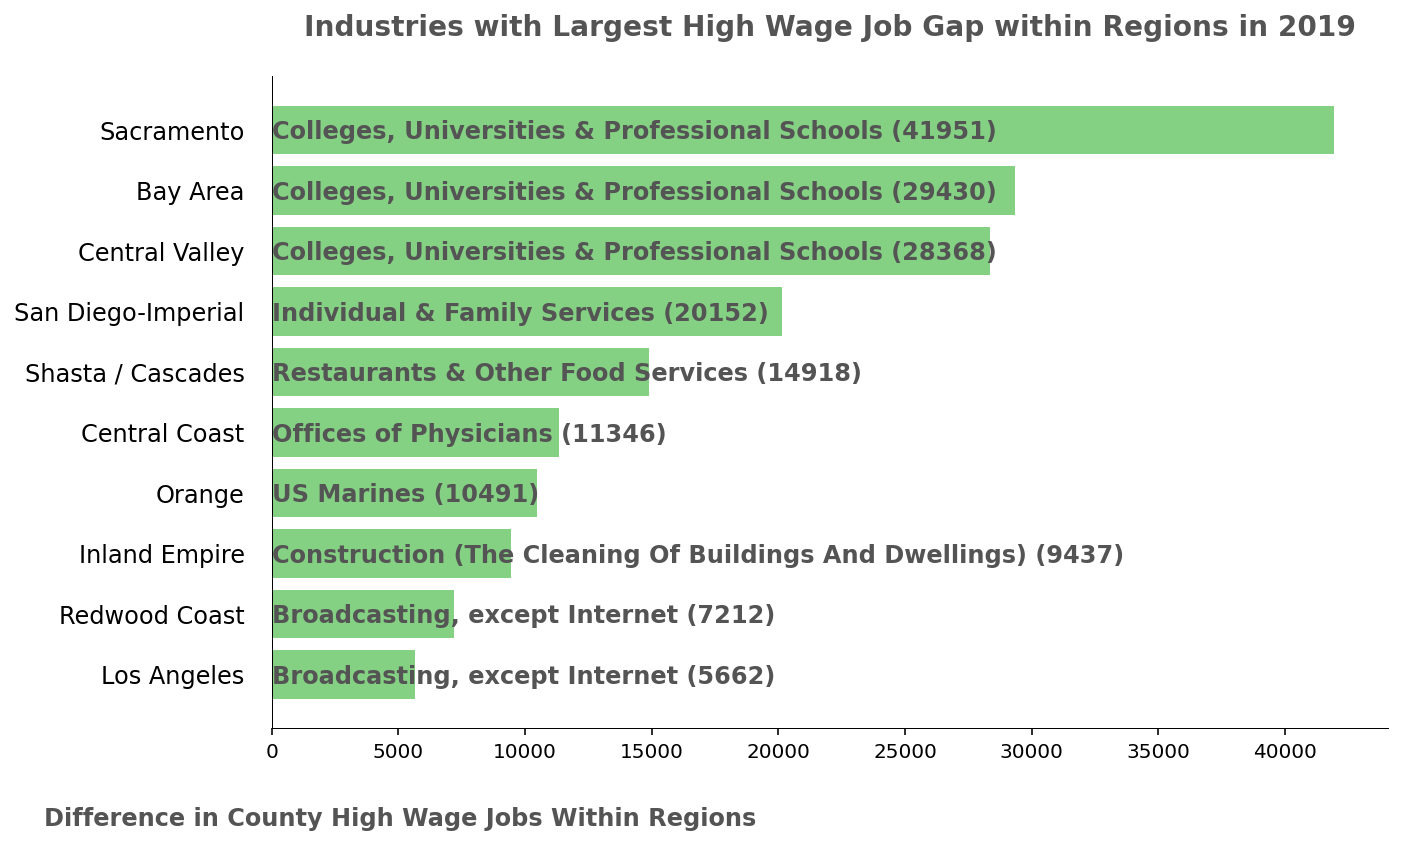

In [389]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), max_min_cut['hw_diff'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(max_min_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("Difference in County High Wage Jobs Within Regions", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

# ax.vlines(x=hw_county['hw_to_pop_perc'].values.mean(), ymin=-0.8, ymax=10, 
#           color='#8e95a3', lw=2, ls='dashed', label='Average: 1.54% High Wage Jobs per month')
# ax.set_ylim(-0.75, 10)

ax.set_title('Industries with Largest High Wage Job Gap within Regions in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate('Broadcasting, except Internet (5662)', (0.1, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("Broadcasting, except Internet (7212)", (0.15, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("Construction (The Cleaning Of Buildings And Dwellings) (9437)", (0.18, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("US Marines (10491)", (0.24, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("Offices of Physicians (11346)", (0.25, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("Restaurants & Other Food Services (14918)", (3.15, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("Individual & Family Services (20152)", (3.4, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate('Colleges, Universities & Professional Schools (28368)', (3.5, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate('Colleges, Universities & Professional Schools (29430)', (3.75, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate('Colleges, Universities & Professional Schools (41951)', (4, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.38, 0.35), loc='upper left', fontsize=12)
plt.show()

Histogram of wages by industry / region to see what the distributions look like
Consider doing something like having the number of "very high wage jobs" which pay 1.5-2x the normal wage.